# Categorical Boosting (CatBoost) -  Noise filtering 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import catboost
import os

## Dataset

Generate training data (to be changed with a dataset):

- x: training input (in this case a sinusoidal signal with noise)
- y: training ground truth (the same sinusoidal signal, but without noise)

Input variables: 

- batch_size: number of samples to be generated
- t_size: dimensional size of each sample
- power: multiplier used to scale noise

In [4]:
def generate_data(batch_size=16, t_size=256, power=0.4):
    # Initialize input and ground truth variables
    x = np.zeros((batch_size, t_size))
    y = np.zeros((batch_size, t_size))
    
    # Start generator
    while True:
        
        # Fill batches
        for i in range(batch_size):
            
            sign = np.random.choice([-1,1], t_size)
            start = np.random.rand(1)[0] 
            
            # Generate Samples
            # Time
            t = np.linspace(np.pi*start, 4*np.pi*start, t_size)
            # Ground truth
            y[i,:] = np.sin(t)
            # Input with noise
            x[i,:] = y[i,:] + (sign*power*np.random.rand(t_size))
            
        # Return values for generator
        yield x, y

Call the generator to get a training sample

In [5]:
x, y = next(iter(generate_data(batch_size=1, t_size=256, power=0.2)))

Plot an example

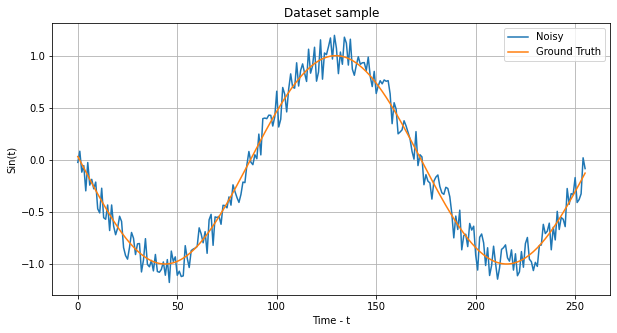

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(x[0,:], label='Noisy')
ax.plot(y[0,:], label='Ground Truth')
ax.set_xlabel('Time - t')
ax.set_ylabel('Sin(t)')
ax.set_title('Dataset sample')
ax.legend()
ax.grid()
plt.show()

## Define the CatBoost Regressor

In [16]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(
            iterations=700,
            task_type='CPU',
            learning_rate=0.02,
            loss_function='MultiRMSE',
            random_seed=101,
            max_depth=3,
            eval_metric='MultiRMSE',
            verbose = True,
            early_stopping_rounds = 50
        )

Load training and validation dataset

In [17]:
x_train, y_train = next(iter(generate_data(batch_size=400, t_size=256, power=0.2)))
x_test, y_test = next(iter(generate_data(batch_size=10, t_size=256, power=0.2)))

Train the CatBoost Regressor

In [18]:
regressor.fit(x_train, 
              y_train, 
              eval_set = (x_test, y_test)
             )

0:	learn: 10.5462159	test: 10.7633515	best: 10.7633515 (0)	total: 239ms	remaining: 2m 47s
1:	learn: 10.3838886	test: 10.5935930	best: 10.5935930 (1)	total: 482ms	remaining: 2m 48s
2:	learn: 10.2298263	test: 10.4473053	best: 10.4473053 (2)	total: 729ms	remaining: 2m 49s
3:	learn: 10.0791721	test: 10.3004541	best: 10.3004541 (3)	total: 978ms	remaining: 2m 50s
4:	learn: 9.9182007	test: 10.1356684	best: 10.1356684 (4)	total: 1.22s	remaining: 2m 49s
5:	learn: 9.7693110	test: 9.9928188	best: 9.9928188 (5)	total: 1.49s	remaining: 2m 52s
6:	learn: 9.6379632	test: 9.8724253	best: 9.8724253 (6)	total: 1.74s	remaining: 2m 52s
7:	learn: 9.4890981	test: 9.7213723	best: 9.7213723 (7)	total: 2.06s	remaining: 2m 57s
8:	learn: 9.3518608	test: 9.5703403	best: 9.5703403 (8)	total: 2.3s	remaining: 2m 56s
9:	learn: 9.2048213	test: 9.4161923	best: 9.4161923 (9)	total: 2.55s	remaining: 2m 56s
10:	learn: 9.0625232	test: 9.2879695	best: 9.2879695 (10)	total: 2.81s	remaining: 2m 55s
11:	learn: 8.9371385	test: 9

Save trained model

In [24]:
regressor.save_model(os.path.join('weights', 'noise_filter'))
#regressor.load_model(os.path.join('weights', 'noise_filter'))

Apply the trained regressor

In [19]:
y_p = regressor.predict(x_test)

Plot results

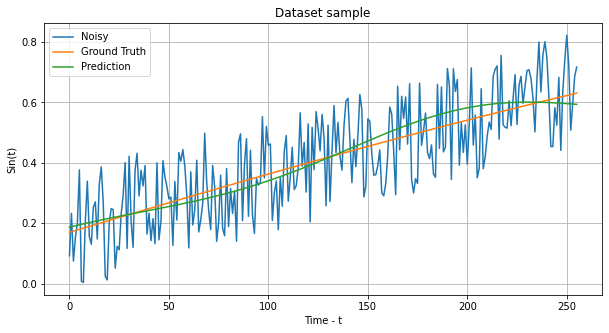

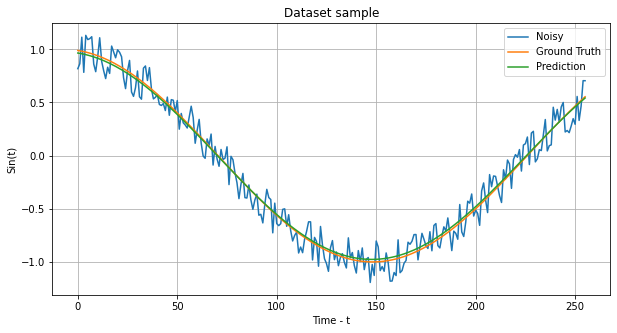

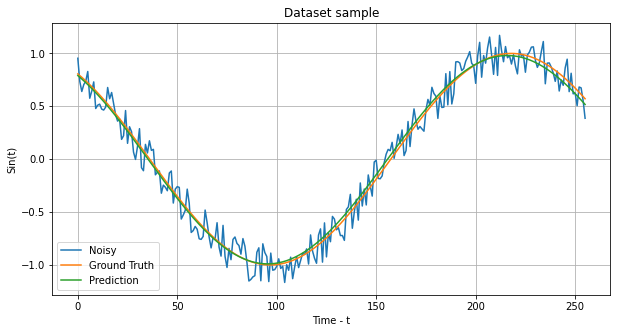

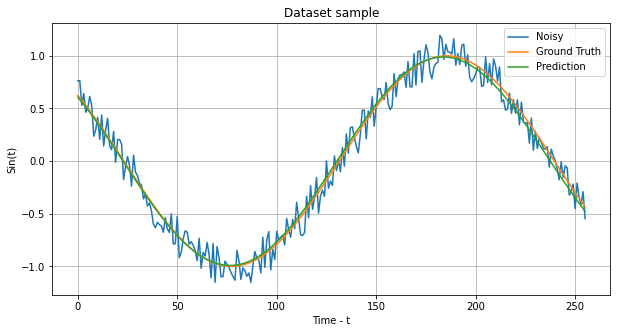

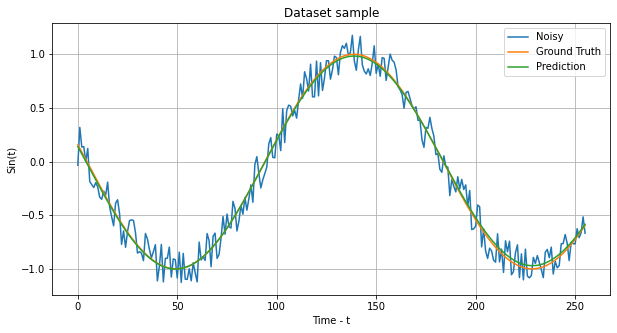

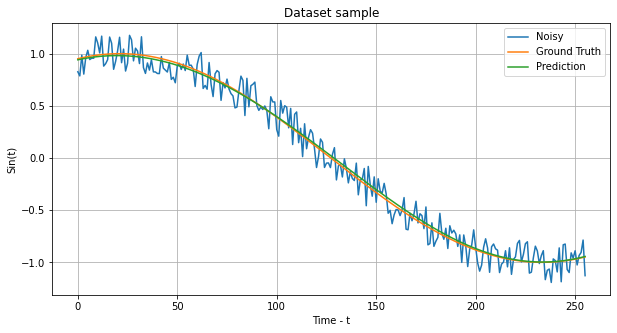

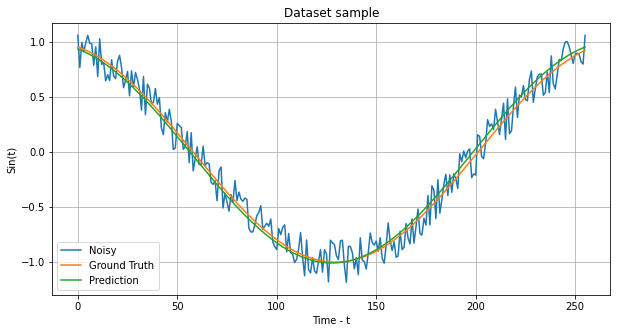

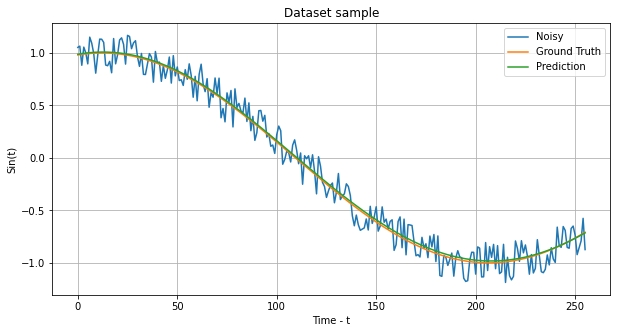

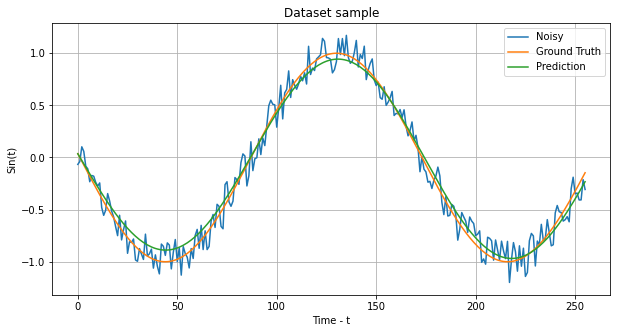

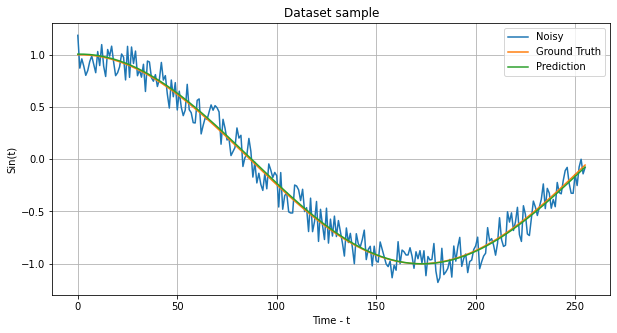

In [20]:
for i in range(x_test.shape[0]):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    ax.plot(x_test[i,:], label='Noisy')
    ax.plot(y_test[i,:], label='Ground Truth')
    ax.plot(y_p[i,:], label='Prediction')
    ax.set_xlabel('Time - t')
    ax.set_ylabel('Sin(t)')
    ax.set_title('Dataset sample')
    ax.legend()
    ax.grid()
    plt.show()
    plt.close()